## Goal
Goal of this notebook is to try applying transfer learning to Resnet models. 
Functionally, I want to try training a model where the first half of training is strictly on blrured images.
The idea is that the blurred image training will learn strictly the geometric information and edge information associated w/ the shapes of interest
To do this, I need ot make sure that hte data laoder knows how to blur my images

In [1]:
from facet_ml.classification import cnn
import torch
from torch import nn
import numpy as np
from torchvision.models import resnet152

In [2]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
    

In [3]:
## Prepare the model if trained normally
# Load data
csv_path = r"C:\Users\Jacob\Desktop\Academics\Mirkin\colloidal_crystal_ML\ProcessedData\Training_Data_20240216\2024_02_27_Rachel-C_Processed.csv"
h5_path = r"C:\Users\Jacob\Desktop\Academics\Mirkin\colloidal_crystal_ML\ProcessedData\Training_Data_20240216\2024_02_16_Rachel-C_Training.h5"
dataloaders, datasizes = cnn.load_colloidal_datasets(
    csv_file=csv_path,
    h5_file=h5_path,
    num_workers=2,
    batch_size=16,
    split_frac=0.7,
    stratify=True,
)

# Load model
model = cnn.get_model(5, resnet152(weights="DEFAULT"))
# model = cnn.UNet(3, 5)
model.to(device=device)

## Get model trianing information
criterion = nn.CrossEntropyLoss()

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0001)

# and a learning rate scheduler
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

model, loss_dict, accuracy_dict = cnn.train_model(
    model,
    criterion,
    optimizer,
    lr_scheduler,
    num_epochs=50,
    dataloaders=dataloaders,
    dataset_sizes=datasizes,
)

c:\Users\Jacob\miniconda3\envs\colloidal_crystal_env\lib\site-packages\torchvision\transforms\v2\_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


Epoch 0/49
----------
train Loss: 0.9203 Acc: 0.6202, (1011/1630)
test Loss: 0.6224 Acc: 0.7745, (316/408)

Epoch 1/49
----------
train Loss: 0.6529 Acc: 0.7497, (1222/1630)
test Loss: 0.5593 Acc: 0.7696, (314/408)

Epoch 2/49
----------
train Loss: 0.5028 Acc: 0.8160, (1330/1630)
test Loss: 0.6163 Acc: 0.7745, (316/408)

Epoch 3/49
----------
train Loss: 0.3267 Acc: 0.8810, (1436/1630)
test Loss: 0.5543 Acc: 0.8064, (329/408)

Epoch 4/49
----------
train Loss: 0.2460 Acc: 0.9209, (1501/1630)
test Loss: 0.5673 Acc: 0.8088, (330/408)

Epoch 5/49
----------
train Loss: 0.1934 Acc: 0.9405, (1533/1630)
test Loss: 0.5724 Acc: 0.7966, (325/408)

Epoch 6/49
----------
train Loss: 0.1636 Acc: 0.9509, (1550/1630)
test Loss: 0.5746 Acc: 0.8015, (327/408)

Epoch 7/49
----------
train Loss: 0.1615 Acc: 0.9546, (1556/1630)
test Loss: 0.5855 Acc: 0.8039, (328/408)

Epoch 8/49
----------
train Loss: 0.1557 Acc: 0.9540, (1555/1630)
test Loss: 0.5766 Acc: 0.7917, (323/408)

Epoch 9/49
----------
train 

In [4]:
'''
Epoch 49/49
----------
train Loss: 0.1279 Acc: 0.9632, (1570/1630)
test Loss: 0.5245 Acc: 0.8186, (334/408)
'''

'\nEpoch 49/49\n----------\ntrain Loss: 0.1279 Acc: 0.9632, (1570/1630)\ntest Loss: 0.5245 Acc: 0.8186, (334/408)\n'

In [5]:
## Prepare the data as if doing blur then unblurred
csv_path = r"C:\Users\Jacob\Desktop\Academics\Mirkin\colloidal_crystal_ML\ProcessedData\Training_Data_20240216\2024_02_27_Rachel-C_Processed.csv"
h5_path = r"C:\Users\Jacob\Desktop\Academics\Mirkin\colloidal_crystal_ML\ProcessedData\Training_Data_20240216\2024_02_16_Rachel-C_Training.h5"

dataloaders_nb, datasizes_nb = cnn.load_colloidal_datasets(
    csv_file=csv_path,
    h5_file=h5_path,
    num_workers=2,
    batch_size=16,
    split_frac=0.7,
    stratify=True,
    mode="no_blur"
)
dataloaders_b, datasizes_b = cnn.load_colloidal_datasets(
    csv_file=csv_path,
    h5_file=h5_path,
    num_workers=2,
    batch_size=16,
    split_frac=0.7,
    stratify=True,
    mode="blur"
)

# Load model
model_trans = cnn.get_model(5, resnet152(weights="DEFAULT"))
# model = cnn.UNet(3, 5)
model_trans.to(device=device)

## Get model trianing information
criterion_trans = nn.CrossEntropyLoss()

# construct an optimizer
params_trans = [p for p in model_trans.parameters() if p.requires_grad]
optimizer_trans = torch.optim.SGD(params_trans, lr=0.005, momentum=0.9, weight_decay=0.0001)

# and a learning rate scheduler
lr_scheduler_trans = torch.optim.lr_scheduler.StepLR(optimizer_trans, step_size=3, gamma=0.1)

model_trans, loss_dict_trans, accuracy_dict_trans = cnn.train_model(
    model_trans,
    criterion_trans,
    optimizer_trans,
    lr_scheduler_trans,
    num_epochs=25,
    dataloaders=dataloaders_b,
    dataset_sizes=datasizes_b,
)

# model_trans, loss_dict_trans_2, accuracy_dict_trans_2 = cnn.train_model(
#     model_trans,
#     criterion_trans,
#     optimizer_trans,
#     lr_scheduler_trans,
#     num_epochs=25,
#     dataloaders=dataloaders_nb,
#     dataset_sizes=datasizes_nb,
# )



c:\Users\Jacob\miniconda3\envs\colloidal_crystal_env\lib\site-packages\torchvision\transforms\v2\_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(
c:\Users\Jacob\miniconda3\envs\colloidal_crystal_env\lib\site-packages\torchvision\transforms\v2\_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


Epoch 0/24
----------
train Loss: 0.9897 Acc: 0.6043, (985/1630)
test Loss: 0.7313 Acc: 0.7230, (295/408)

Epoch 1/24
----------
train Loss: 0.6758 Acc: 0.7399, (1206/1630)
test Loss: 0.7198 Acc: 0.7279, (297/408)

Epoch 2/24
----------
train Loss: 0.5334 Acc: 0.7969, (1299/1630)
test Loss: 0.5844 Acc: 0.7745, (316/408)

Epoch 3/24
----------
train Loss: 0.3824 Acc: 0.8675, (1414/1630)
test Loss: 0.5211 Acc: 0.7990, (326/408)

Epoch 4/24
----------
train Loss: 0.2857 Acc: 0.9018, (1470/1630)
test Loss: 0.5378 Acc: 0.7966, (325/408)

Epoch 5/24
----------
train Loss: 0.2349 Acc: 0.9147, (1491/1630)
test Loss: 0.5570 Acc: 0.7892, (322/408)

Epoch 6/24
----------
train Loss: 0.2108 Acc: 0.9258, (1509/1630)
test Loss: 0.5377 Acc: 0.8235, (336/408)

Epoch 7/24
----------
train Loss: 0.2003 Acc: 0.9387, (1530/1630)
test Loss: 0.5485 Acc: 0.8064, (329/408)

Epoch 8/24
----------
train Loss: 0.1900 Acc: 0.9423, (1536/1630)
test Loss: 0.5402 Acc: 0.8137, (332/408)

Epoch 9/24
----------
train L

In [6]:


## Get model trianing information
criterion_trans = nn.CrossEntropyLoss()

# construct an optimizer
params_trans = [p for p in model_trans.parameters() if p.requires_grad]
optimizer_trans = torch.optim.SGD(params_trans, lr=0.005, momentum=0.9, weight_decay=0.0001)


model_trans, loss_dict_trans_3, accuracy_dict_trans_3 = cnn.train_model(
    model_trans,
    criterion_trans,
    optimizer_trans,
    lr_scheduler_trans,
    num_epochs=25,
    dataloaders=dataloaders_nb,
    dataset_sizes=datasizes_nb,
)


Epoch 0/24
----------
train Loss: 0.9323 Acc: 0.6472, (1055/1630)
test Loss: 0.8107 Acc: 0.6667, (272/408)

Epoch 1/24
----------
train Loss: 0.6291 Acc: 0.7509, (1224/1630)
test Loss: 0.5559 Acc: 0.7941, (324/408)

Epoch 2/24
----------
train Loss: 0.4861 Acc: 0.8227, (1341/1630)
test Loss: 0.6231 Acc: 0.7574, (309/408)

Epoch 3/24
----------
train Loss: 0.3245 Acc: 0.8761, (1428/1630)
test Loss: 0.5690 Acc: 0.7843, (320/408)

Epoch 4/24
----------
train Loss: 0.2394 Acc: 0.9141, (1490/1630)
test Loss: 0.6031 Acc: 0.7868, (321/408)

Epoch 5/24
----------
train Loss: 0.1197 Acc: 0.9577, (1561/1630)
test Loss: 0.6482 Acc: 0.8260, (337/408)

Epoch 6/24
----------
train Loss: 0.1374 Acc: 0.9546, (1556/1630)
test Loss: 0.6920 Acc: 0.7990, (326/408)

Epoch 7/24
----------
train Loss: 0.1408 Acc: 0.9472, (1544/1630)
test Loss: 0.9577 Acc: 0.7451, (304/408)

Epoch 8/24
----------
train Loss: 0.1167 Acc: 0.9632, (1570/1630)
test Loss: 0.7732 Acc: 0.7868, (321/408)

Epoch 9/24
----------
train 

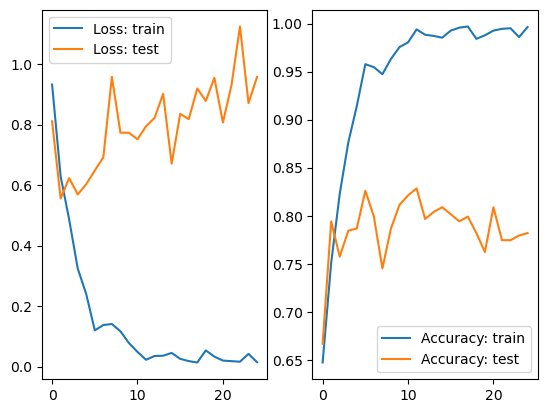

In [7]:
# Make quick plot
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=2)
for ii, key in enumerate(loss_dict_trans_3.keys()):
    # ax = axes[ii]
    x = np.array(range(len(loss_dict_trans_3[key])))

    for ii, (label, dict_oi) in enumerate(
        [("Loss", loss_dict_trans_3), ("Accuracy", accuracy_dict_trans_3)]
    ):
        ax = axes[ii]
        y = np.array(dict_oi[key])

        ax.plot(x, y, label=f"{label}: {key}")
        ax.legend()

fig.savefig("Model_performance.png")
torch.save(model_trans.state_dict(), "TRANSFER_resnet152_trained.pth")